In [33]:
import meep as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [34]:
l = 20
w = 8
h = 0
cell = mp.Vector3(l,w,h)

In [42]:
geometry = [mp.Block(mp.Vector3(12,1,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12)),mp.Cylinder(radius=1.5,material=mp.Medium(epsilon=12))]
sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                     component=mp.Ez,
                     center=mp.Vector3(-6.25,0))]

In [43]:
pml_layers = [mp.PML(1.0)]
resolution = 10
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000108004 s
Working in 2D dimensions.
Computational cell is 20 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 1.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0305688 s
-----------


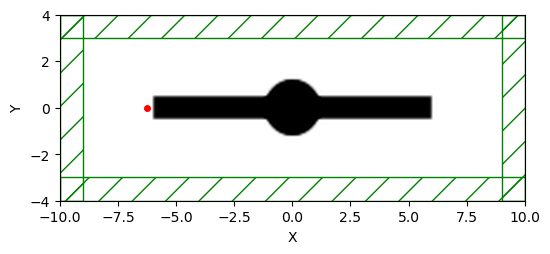

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()

In [45]:
sim.run(until=400)

run 0 finished at t = 400.0 (8000 timesteps)


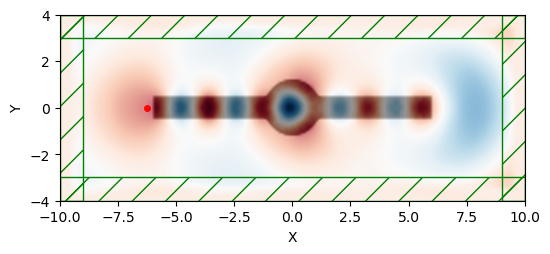

In [46]:
plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [47]:
sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
plt.close()
sim.run(mp.at_every(1,Animate),until=100)
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 7.98702e-05 s
Working in 2D dimensions.
Computational cell is 20 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 1.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0301931 s
-----------
Normalizing field data...
run 1 finished at t = 100.0 (2000 timesteps)


In [48]:
filename = "straight_circle_waveguide.mp4"
Animate.to_mp4(10,filename)
from IPython.display import Video
Video(filename)

Generating MP4...
